In [1]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Using TensorFlow backend.


Python version :  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
TensorFlow version :  2.2.0
Keras version :  2.3.1


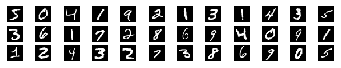

In [9]:
from keras.datasets import mnist
mnist = keras.datasets.mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize = (6, 1))
for i in range(36) :
    plt.subplot(3, 12, i + 1)
    plt.imshow(X_train0[i], cmap = "gray")
    plt.axis("off")
    
plt.show()

In [11]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 225.

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', 
                 activation = 'relu', 
                 input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)             

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, 
                batch_size = batch_size, 
                epochs = epochs, 
                verbose = 1, 
                validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1936 - accuracy: 0.9394 - val_loss: 0.0529 - val_accuracy: 0.9830
Epoch 2/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.0307 - val_accuracy: 0.9904
Epoch 3/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0273 - val_accuracy: 0.9917
Epoch 4/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0298 - val_accuracy: 0.9896
Epoch 5/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0224 - val_accuracy: 0.9921
Epoch 6/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0255 - val_accuracy: 0.9913
Epoch 7/12
60000/60000 [==============================] - 75s 1ms/st

Test loss:  0.02119434226879626
Test accuracy:  0.9933000206947327


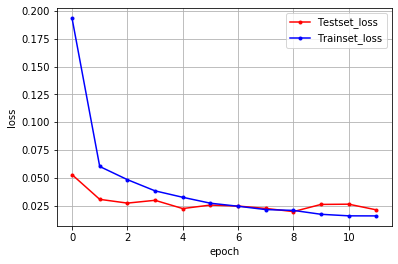

In [15]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

# 테스트, 학습 오차 그래프
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

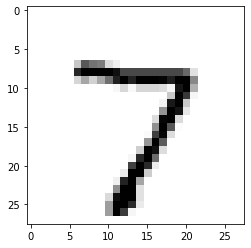

The Answer is  [7]


In [16]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()
print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))